# Importación de librerias

In [74]:
# Importamos las librerias necesarias

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Importación Datasheet y data exploration

## Dataframe

In [75]:
# Importamos el datasheet en formato CSV y lo pasamos a DataFrame con el que trabajar.
# Hacemos una visualización de las 5 primeras rows para ver qué tipo de datos y columnas tenemos.

results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


** Vemos cada partido disputado, entre qué equipos, los goles de cada uno, en qué torneo fue, así como la fecha, la ciudad y el país donde se disputó el partido.

In [76]:
# Resumen de la información de todo nuestro DataFrame.

results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41586 entries, 0 to 41585
Data columns (total 9 columns):
date          41586 non-null object
home_team     41586 non-null object
away_team     41586 non-null object
home_score    41586 non-null int64
away_score    41586 non-null int64
tournament    41586 non-null object
city          41586 non-null object
country       41586 non-null object
neutral       41586 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [77]:
# Shape del DataFrame

results.shape

(41586, 9)

Este datasheet contiene 41.586 resultados de partidos internacionales, desde el primer partido oficial en 1972 hasta 2019. Incluye tanto competiciones internaciones oficiales como partidos amistosos. No se incluye Juegos Olímpicos. Solo incluye fútbol masculino.

**Columnas**

- Date - Día del partido
- home_team - Equipo que actúa como local
- away_team - Equipo que actúa como visitante
- home_score - Número de goles equipo que actúa como local
- away_score - Número de goles equipo que actúa como visitante
- tournament - Nombre del torneo
- city - Ciudad donde se jugó el partido
- country - País donde se jugó el partido
- neutral - Si el partido se jugó o no en campo neutral

## Revisión de null values

In [78]:
# Comprobamos si hay null values en el DataFrame

results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

# Worldcup Data

In [79]:
# Vamos a ver cuáles son los diferentes Tournaments que hay

results.tournament.unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

**Seleccionaremos el torneo Worldcup para nuestro proyecto y visualización**

In [80]:
worldcup = results[(results['tournament'] == "FIFA World Cup")]
worldcup

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True
...,...,...,...,...,...,...,...,...,...
39945,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False
39946,2018-07-10,France,Belgium,1,0,FIFA World Cup,St. Petersburg,Russia,True
39947,2018-07-11,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True
39948,2018-07-14,Belgium,England,2,0,FIFA World Cup,St. Petersburg,Russia,True


## Manipulación Dataframe Worldcup

**Creamos una columna que a nivel de fechas refleje únicamente el año del partido.**

In [81]:
# La columna date está como object. Convertimos a formato datetime.

worldcup["date"] = pd.to_datetime(worldcup["date"])

# Incluimos en nuestro DF la columna reflejando únicamente el año del partido.

worldcup["year"] = worldcup["date"].dt.year

# Seleccionamos y Reordenamos columnas para mejor interpretación de data.

worldcup = worldcup[["home_team","away_team","home_score","away_score","tournament","country","year"]]
worldcup.head()

<ipython-input-81-b7c07291a443>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worldcup["date"] = pd.to_datetime(worldcup["date"])
<ipython-input-81-b7c07291a443>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worldcup["year"] = worldcup["date"].dt.year


,home_team,away_team,home_score,away_score,tournament,country,year
1304,Belgium,United States,0,3,FIFA World Cup,Uruguay,1930
1305,France,Mexico,4,1,FIFA World Cup,Uruguay,1930
1306,Brazil,Yugoslavia,1,2,FIFA World Cup,Uruguay,1930
1307,Peru,Romania,1,3,FIFA World Cup,Uruguay,1930
1308,Argentina,France,1,0,FIFA World Cup,Uruguay,1930


**Creamos una columna para reflejar el ganador de cada partido o si ha sido empate**

In [82]:
# Creamos lista donde incluiremos quién ha sido el ganador de cada partido.

winner_team = []

for i, row in worldcup.iterrows():
    if row["home_score"] > row["away_score"]:
        winner_team.append(row["home_team"])
    elif row["home_score"] < row["away_score"]:
        winner_team.append(row["away_team"])
    else:
        winner_team.append("Draw")

# Creamos una nueva columna en nuestro DF donde se reflejen los valores de la lista creada

worldcup["winner"] = winner_team

# Visualizamos primeras 5 rows para ver cómo queda.

worldcup.head()

<ipython-input-82-1e0bc56dd896>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worldcup["winner"] = winner_team


,home_team,away_team,home_score,away_score,tournament,country,year,winner
1304,Belgium,United States,0,3,FIFA World Cup,Uruguay,1930,United States
1305,France,Mexico,4,1,FIFA World Cup,Uruguay,1930,France
1306,Brazil,Yugoslavia,1,2,FIFA World Cup,Uruguay,1930,Yugoslavia
1307,Peru,Romania,1,3,FIFA World Cup,Uruguay,1930,Romania
1308,Argentina,France,1,0,FIFA World Cup,Uruguay,1930,Argentina


**Creamos una columna con el Total de goles para cada partido.**

In [83]:
# Añadimos numero de goles totales a nuestro dataset de Worldcup

worldcup["total_goals"] = worldcup["home_score"] + worldcup["away_score"]

worldcup.head()

<ipython-input-83-b39fef8fe76d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worldcup["total_goals"] = worldcup["home_score"] + worldcup["away_score"]


,home_team,away_team,home_score,away_score,tournament,country,year,winner,total_goals
1304,Belgium,United States,0,3,FIFA World Cup,Uruguay,1930,United States,3
1305,France,Mexico,4,1,FIFA World Cup,Uruguay,1930,France,5
1306,Brazil,Yugoslavia,1,2,FIFA World Cup,Uruguay,1930,Yugoslavia,3
1307,Peru,Romania,1,3,FIFA World Cup,Uruguay,1930,Romania,4
1308,Argentina,France,1,0,FIFA World Cup,Uruguay,1930,Argentina,1


# Data Visualization

## Selecciones con mayor número de victorias en Worldcup

In [84]:
worldcup["winner"].value_counts()

Draw           199
Brazil          73
Germany         67
Italy           45
Argentina       43
              ... 
Wales            1
Cuba             1
Jamaica          1
Slovenia         1
North Korea      1
Name: winner, Length: 63, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

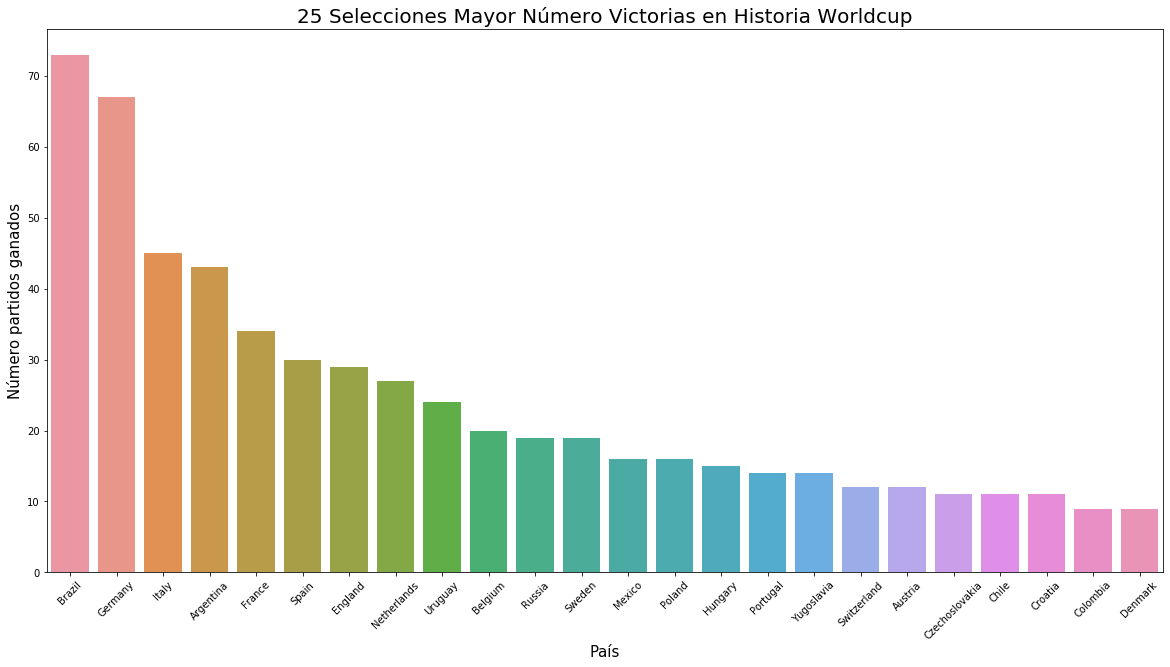

In [85]:
plt.figure(figsize = (20,10))

sns.countplot(x = "winner", data = worldcup, order = worldcup["winner"].value_counts()[1:25].index)

plt.title("25 Selecciones Mayor Número Victorias en Historia Worldcup", fontsize = 20)
plt.ylabel("Número partidos ganados", fontsize = 15)
plt.xlabel("País", fontsize = 15)
plt.xticks(rotation=45)

- **Vemos como Brasil es la selección con mayor número de victorias en la historia de las Worldcups**
- La sigue Alemania y ya a mayor distancia aparecen Italia y Argentina.

## Evolución del número de goles en cada Worldcup

In [86]:
goals_evolution = worldcup.groupby(['year'])['total_goals'].sum()
goals_evolution.head()

year
1930     70
1934     70
1938     84
1950     88
1954    140
Name: total_goals, dtype: int64

(array([ 60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 7 Text yticklabel objects>)

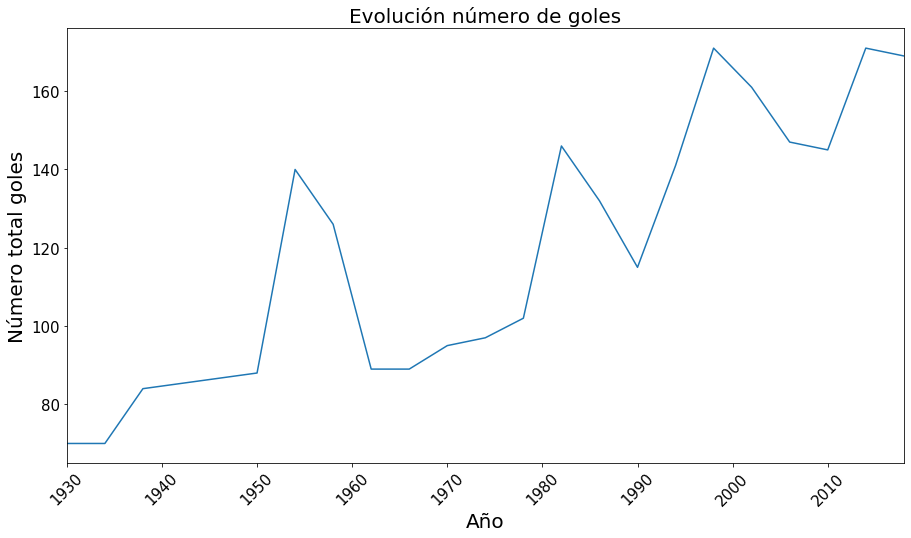

In [87]:
plt.figure(figsize = (15,8))

ax = goals_evolution.plot(kind = 'line')
ax.set_title('Evolución número de goles', fontsize = 20)
ax.set_xlabel('Año', fontsize = 20)
ax.set_ylabel('Número total goles', fontsize = 20)
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)

- **Vemos como la tendencia a lo largo de los Worldcups disputados es la de un mayor número de goles**
- Está influido por el número de partidos que se juegan en cada Worldcup, como veremos más adelante.

## Histrograma Distribución goles por partido.

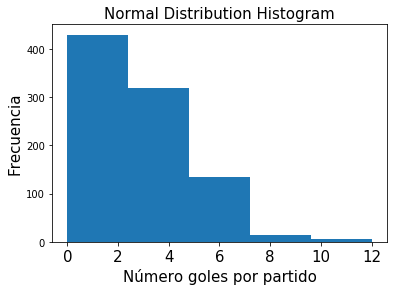

In [88]:
fig, ax = plt.subplots()

ax.hist(worldcup['total_goals'], bins = 5)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.xlabel('Número goles por partido',fontsize=15)
plt.ylabel('Frecuencia',fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 10)
plt.show()

**Vemos como como el número de goles más frecuente por partido se sitúa entre 0 y 2 goles.**

##  Boxplot goles en cada Worldcup

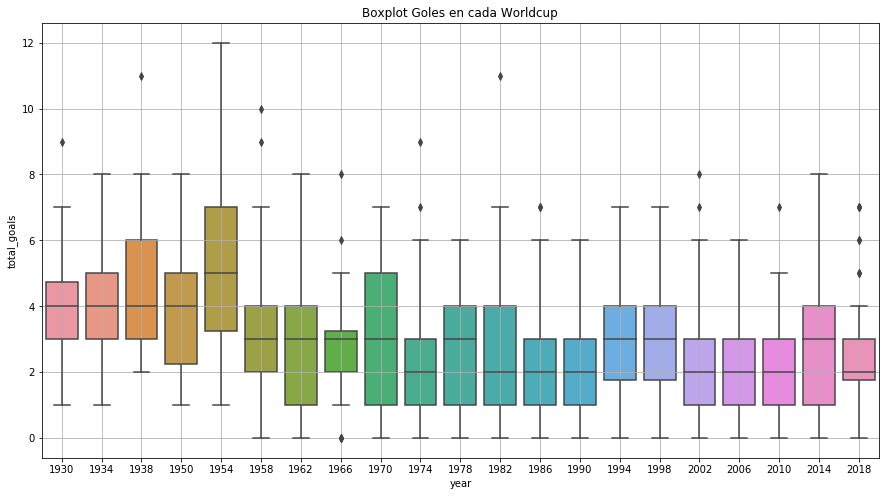

In [58]:
plt.figure(figsize = (15,8))

sns.boxplot(y = worldcup["total_goals"], x = worldcup["year"])
plt.grid(True)

plt.title("Boxplot Goles en cada Worldcup")
plt.show()

**Obtenemos una visualización conjunta de cuál es el mínimo y máximo número de goles por partido en cada Worldcup, así como la mediana, primer y tercer quartile y número de partidos con número desproporcionado de goles (outliers).**

## Scatter Plot Número Partidos vs Numero Goles Totales

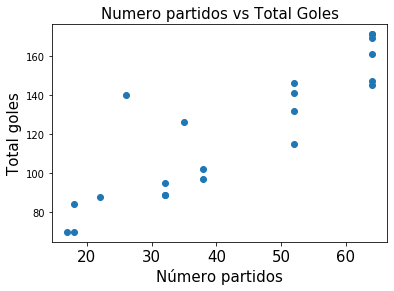

In [70]:
fig, ax = plt.subplots()


ax.scatter(worldcup.groupby(['year'])['country'].count(), worldcup.groupby(['year'])['total_goals'].sum())

plt.title('Numero partidos vs Total Goles',fontsize = 15)
plt.xlabel('Número partidos',fontsize=15)
plt.ylabel('Total goles',fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 10)

plt.show()

- **Como intuiamos anteriormente, el número de goles totales por Worldcup está influenciado por el número total de partidos que ha habido en cada edición**
- A mayor número de partidos, mayor número de goles por regla general nos encontramos.